In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy
import ast

In [2]:
df = pd.read_csv("evolutionary.csv")
df

,Gen Number,ID,Fitness,Weights,Diversity,Black Line Percentage
0,0,1,0.037418,"[-0.9075348701318955, 0.427041307035708, -0.20...",0.535088,0.000000
1,0,2,0.036064,"[-0.6920253084911796, -0.5823079599248215, -0....",0.535088,0.000000
2,0,3,0.035175,"[-0.4274488864852577, -0.7342674482619236, 0.6...",0.535088,0.000000
3,0,4,0.037515,"[-0.40192531491264205, 0.15290298477104747, 0....",0.535088,0.000000
4,0,5,0.042511,"[-0.2149763633527697, -0.3077721576229857, -0....",0.535088,0.000000
...,...,...,...,...,...,...
2795,139,2240,0.030415,"[0.30210542847295885, -0.7702062776395467, -0....",0.449818,0.000000
2796,139,2241,0.029719,"[0.22345557799533422, -0.6529818721100928, -0....",0.449818,0.000000
2797,139,2242,-0.139447,"[-0.11043252082906391, 0.7662357316835153, 1, ...",0.449818,0.611004
2798,139,2243,0.029834,"[0.21225860763761162, 0.25302412013850656, 1, ...",0.449818,0.000000


In [3]:
def plot_graph(x_values, y_values, title):
    # Optional: set a nice style
    plt.style.use("tableau-colorblind10")  # or 'ggplot', 'bmh', 'fivethirtyeight', etc.

    # Create your figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))  # you can adjust the size

    # Plot something
    ax.plot(x_values, y_values, label='Label', color='blue', marker='o')

    # Add titles and labels
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('X Axis Label', fontsize=12)
    ax.set_ylabel('Y Axis Label', fontsize=12)

    # Grid, legend, etc.
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()
    ax.tick_params(axis='both', labelsize=10)

    # Optional: annotate points
    # ax.annotate('Note', xy=(x, y), xytext=(x+1, y+1), arrowprops=dict(arrowstyle='->'))

    # Save or show
    plt.tight_layout()
    plt.show()  # Show the plot


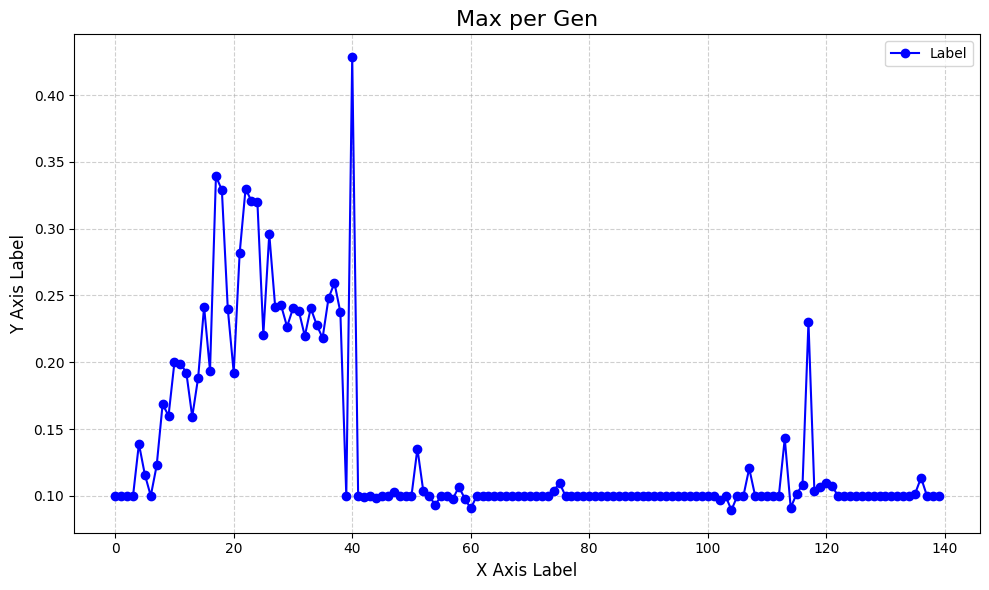

In [4]:
diversity_per_gen = df.groupby("Gen Number")["Fitness"].max().reset_index()

x_values = diversity_per_gen.index
y_values = diversity_per_gen["Fitness"]

plot_graph(x_values, y_values, "Max per Gen")

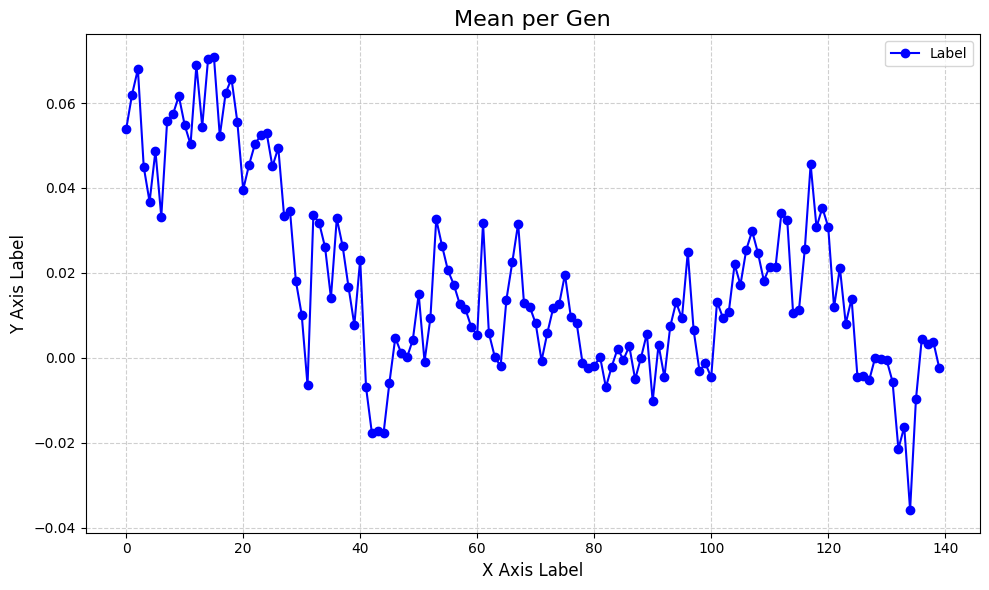

In [5]:
diversity_per_gen = df.groupby("Gen Number")["Fitness"].mean().reset_index()

x_values = diversity_per_gen.index
y_values = diversity_per_gen["Fitness"]

plot_graph(x_values, y_values, "Mean per Gen")

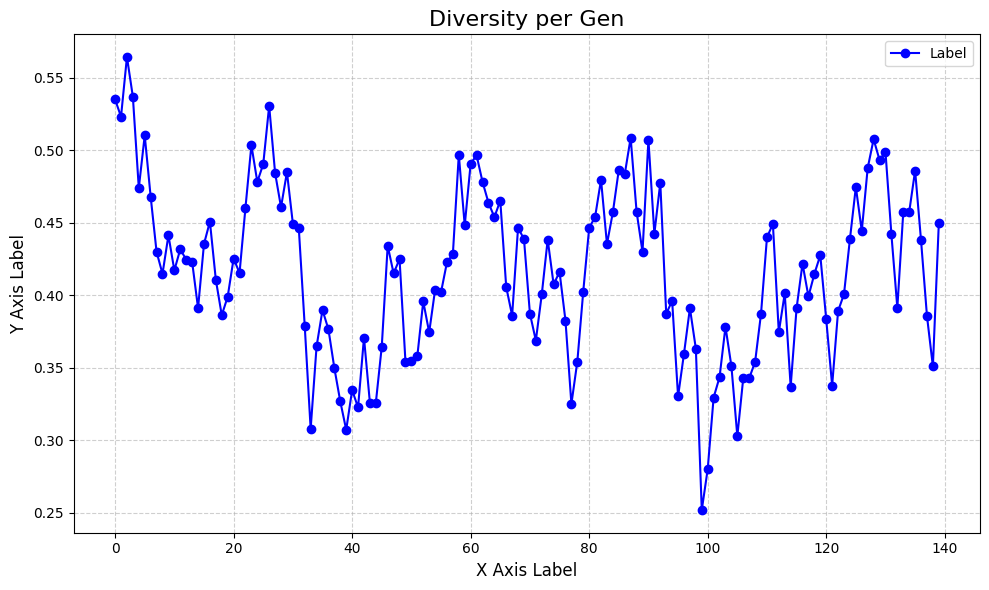

In [6]:
diversity_per_gen = df.groupby("Gen Number")["Diversity"].mean().reset_index()

x_values = diversity_per_gen.index
y_values = diversity_per_gen["Diversity"]

plot_graph(x_values, y_values, "Diversity per Gen")

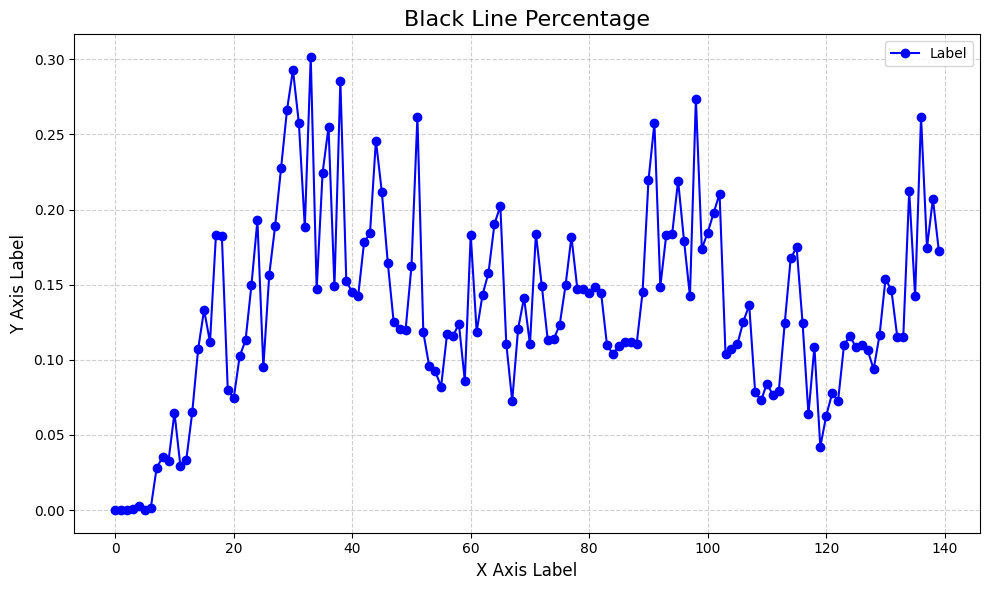

In [7]:
black_area_covered_per_gen = df.groupby("Gen Number")["Black Line Percentage"].mean().reset_index()

x_values = black_area_covered_per_gen.index
y_values = black_area_covered_per_gen["Black Line Percentage"]

plot_graph(x_values, y_values, "Black Line Percentage")

In [70]:
import torch
import torch.nn as nn

SIMPLE_NET_INPUT = 2
SIMPLE_NET_HIDDEN = 4
SIMPLE_NET_OUTPUT = 2

SIMPLE_N_LAYERS = 2

class SimpleNet(torch.nn.Module):
    def __init__(self, layers_sizes):        
        super().__init__() 
        self.layers_sizes = layers_sizes
        self.FC = nn.Sequential(
            nn.Linear(layers_sizes[0]["input"], layers_sizes[0]["ouput"]),
            nn.Tanh(), 
            nn.Linear(layers_sizes[1]["input"], layers_sizes[1]["ouput"]),  
            nn.Tanh()
        )

    def forward(self, x): 
        x = self.FC(x)
        return x.detach().numpy().tolist()
    
    def set_weights(self, weights):
        with torch.no_grad():
            index = 0
            for layer_size in self.layers_sizes:
                connections = []
                for _ in range(layer_size["ouput"]):
                    row = []
                    for _ in range(layer_size["input"]):
                        row.append(weights[index])
                        index += 1
                    connections.append(row)
                bias = []
                for _ in range(layer_size["ouput"]):
                    bias.append(weights[index])
                    index += 1
    
                self.FC[layer_size["n"]].weight.copy_(torch.tensor(connections))
                self.FC[layer_size["n"]].bias.copy_(torch.tensor(bias))

In [86]:
model = SimpleNet([{"input": 2,"ouput": 4, "n": 0}, {"input": 4, "ouput" : 2, "n": 2}])
sample_input = torch.tensor([1, 2], dtype=torch.float32)
output = model(sample_input)

for name, param in model.named_parameters():
    print(name, param.detach().numpy().tolist())


weights = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1]
model.set_weights(weights)

for name, param in model.named_parameters():
    print(name, param.detach().numpy().tolist())

FC.0.weight [[-0.08589696884155273, -0.06370478868484497], [-0.3355354368686676, -0.6384323835372925], [-0.6646339297294617, 0.33910804986953735], [-0.5300805568695068, -0.11825454235076904]]
FC.0.bias [-0.5222405791282654, 0.6386041045188904, -0.4141819477081299, 0.029330670833587646]
FC.2.weight [[0.36510223150253296, 0.051931023597717285, 0.3885316848754883, -0.2848268747329712], [0.4137447476387024, -0.3871285319328308, 0.3887842893600464, 0.4680558443069458]]
FC.2.bias [0.31512314081192017, 0.2078074812889099]
FC.0.weight [[0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]
FC.0.bias [0.0, 1.0, 2.0, 3.0]
FC.2.weight [[0.0, 1.0, 2.0, 3.0], [0.0, 1.0, 2.0, 3.0]]
FC.2.bias [0.0, 1.0]


In [62]:
class Evolutive_Weight:
    def __init__(self, layers_sizes):
        self.layers_sizes = layers_sizes

    def to_list(self, weights):
        def to_list_connections(conections):
            connections_l = []
            for connection_l in conections:
                for connection in connection_l:
                    connections_l.append(connection)
            return connections_l
        result = []
        for layer_w in range(len(weights)):
            result = result + to_list_connections(weights[layer_w]["connections"]) + weights[layer_w]["bias"]
        return result
    
    def to_weight(self, weights_l):
        index = 0
        result = []
        for layer_size in self.layers_sizes:
            connections = []
            for _ in range(layer_size["ouput"]):
                row = []
                for _ in range(layer_size["input"]):
                    row.append(weights_l[index])
                    index += 1
                connections.append(row)
            bias = []
            for _ in range(layer_size["ouput"]):
                bias.append(weights_l[index])
                index += 1
            obj = {"connections": connections,"bias": bias, "n":  layer_size["n"]}
            result.append(obj)
        return result


In [63]:
ws = Evolutive_Weight([{"input": 2,"ouput": 4, "n": 0}, {"input": 4, "ouput" : 2, "n": 2}])
t_l = ws.to_list(weights)
print(t_l)
print(weights)
print(ws.to_weight(t_l))



[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1]
[{'connections': [[0, 1], [0, 1], [0, 1], [0, 1]], 'bias': [0, 1, 2, 3], 'n': 0}, {'connections': [[0, 1, 2, 3], [0, 1, 2, 3]], 'bias': [0, 1], 'n': 2}]
[{'connections': [[0, 1], [0, 1], [0, 1], [0, 1]], 'bias': [0, 1, 2, 3], 'n': 0}, {'connections': [[0, 1, 2, 3], [0, 1, 2, 3]], 'bias': [0, 1], 'n': 2}]
